<a href="https://colab.research.google.com/github/sophiastmn/ML_Labs/blob/main/KMeansLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original map


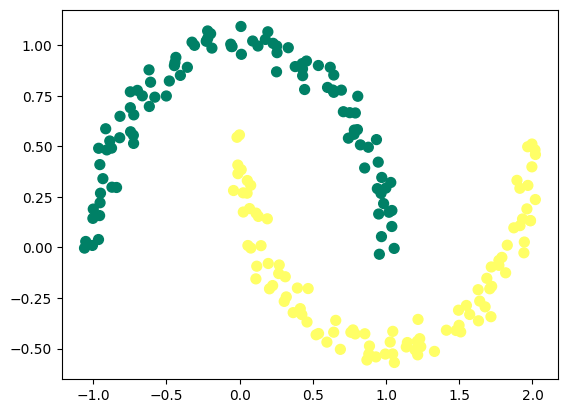

New map (colors = clusters)


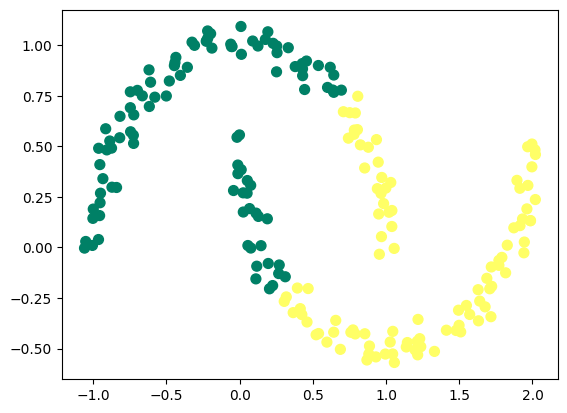

Original map


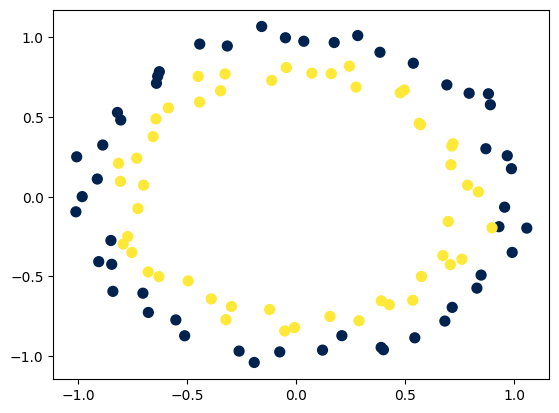

New map


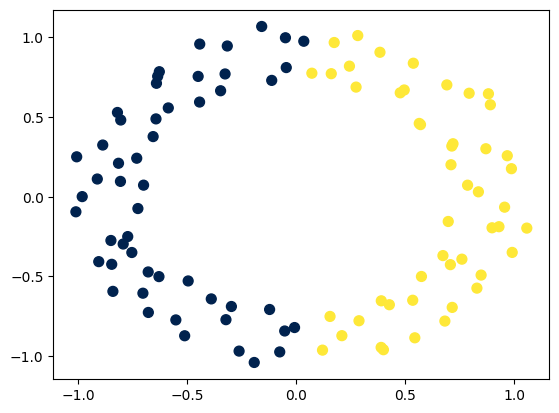

Original map


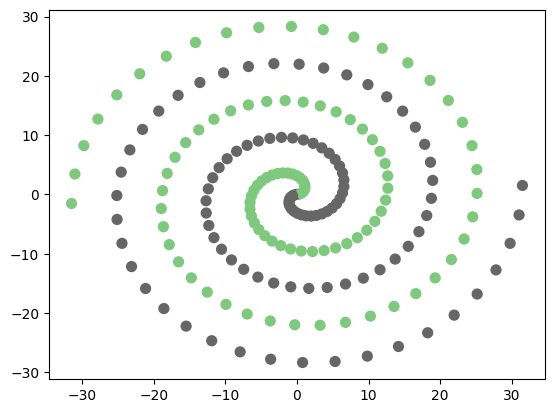

New map


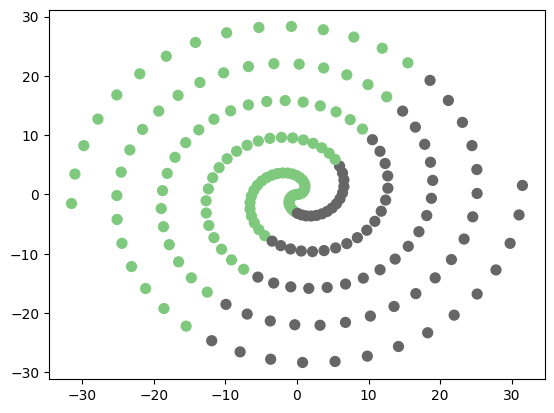

In [100]:
#################### PROBLEM #1 ##########################

#imports
from sklearn.datasets import make_moons;
from sklearn.cluster import KMeans;
from sklearn.datasets import make_circles;
import matplotlib.pyplot as plot;
import math;
import numpy as np;

#global variables
seed = 1880333;

def main():
  #make the moon clusters
  x, y = make_moons(200, noise = 0.05, random_state = seed);
  kmeansMoons = KMeans(n_clusters = 2, random_state = seed).fit_predict(x);
  print("Original map");
  plot.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='summer');
  plot.show();
  plot.cla();
  print("New map (colors = clusters)");
  plot.scatter(x[:, 0], x[:, 1], c=kmeansMoons, s=50, cmap='summer');
  plot.show();
  plot.cla();

  #make the first complicated cluster
  print("Original map");
  x1, y1 = make_circles(noise = 0.05, random_state = seed);
  plot.scatter(x1[:, 0], x1[:, 1], c=y1, s=50, cmap='cividis'); #straight up just the colors of the US Navy
  plot.show();
  plot.cla();
  kmeansCircles = KMeans(n_clusters = 2, init = np.array([[-0.5, -0.5], [1, -0.5]]), random_state = seed).fit_predict(x1);
  print("New map");
  plot.scatter(x1[:, 0], x1[:, 1], c=kmeansCircles, s=50, cmap="cividis");
  plot.show();
  plot.cla();

  #make the second complicated cluster
  print("Original map");
  x2, y2 = makeSpirals(100);
  plot.scatter([i[0] for i in x2], [i[1] for i in x2], c=y2, s=50, cmap="Accent");
  plot.show();
  plot.cla();
  kmeansSpirals = KMeans(n_clusters = 2, init = np.array([[-30, 0], [30, 0]]), random_state = seed).fit_predict(x2);
  print("New map");
  plot.scatter([i[0] for i in x2], [i[1] for i in x2], c=kmeansSpirals, s=50, cmap="Accent");

def makeSpirals(numPoints):
  x = [];
  y = [];
  for i in range(numPoints):
    t = i/(2*math.pi);
    #add to the first helix
    x.append([2*t*math.cos(t), 2*t*math.sin(t)]);
    y.append([0]);
    #add to the second helix
    x.append([2*t*math.cos(t+math.pi), 2*t*math.sin(t+math.pi)]);
    y.append([1]);

  return x, y;

if __name__ == "__main__":
  main();

Original map


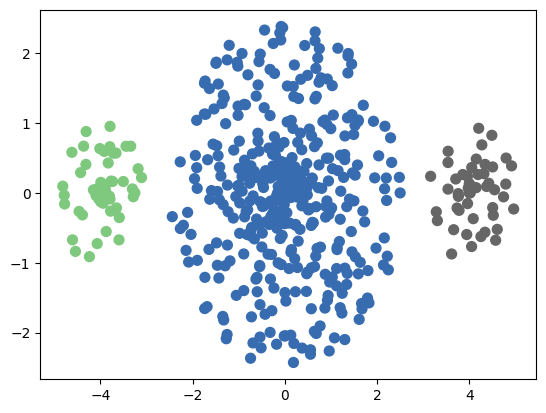

New map


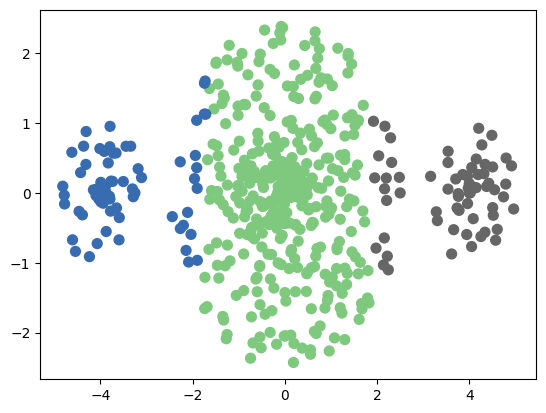

In [114]:
########################### Problem #2 ############################
#imports
from sklearn.cluster import KMeans;
import matplotlib.pyplot as plot;
import random;
import math;
import numpy as np;

#global variables
seed = 1880333;

def main():
  #make the second complicated cluster
  print("Original map");
  x2, y2 = makeUniqueBlobs(400, 50);
  plot.scatter([i[0] for i in x2], [i[1] for i in x2], c=y2, s=50, cmap="Accent");
  plot.show();
  plot.cla();
  kmeansSpirals = KMeans(n_clusters = 3, init = np.array([[0.5, 0.5], [-7, 2], [7,-2]]), random_state = seed).fit_predict(x2);
  print("New map");
  plot.scatter([i[0] for i in x2], [i[1] for i in x2], c=kmeansSpirals, s=50, cmap="Accent");


def makeUniqueBlobs(numPointsBig, numPointsSmall):
  centers = [-4, 0, 4];
  random.seed(1880333);
  x = [];
  y = [];
  for i in range(numPointsSmall):
    r = random.random();
    t = i/(2*math.pi);
    #add to the first circle
    x.append([r*math.cos(t)+centers[0], r*math.sin(t)]);
    y.append([0]);

    #add to the second circle
    r = random.random();
    x.append([r*math.cos(t) + centers[2], r*math.sin(t)]);
    y.append([2]);

  for i in range(numPointsBig):
    r = random.random() * 2.5;
    t = i/(2*math.pi);
    #add to the middle circle
    x.append([r*math.cos(t) + centers[1], r*math.sin(t)]);
    y.append([1]);
  return x, y;

  return x, y;

if __name__ == "__main__":
  main();

Original map


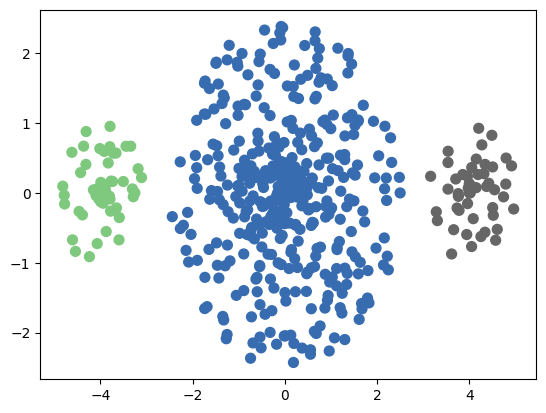

Elbow method


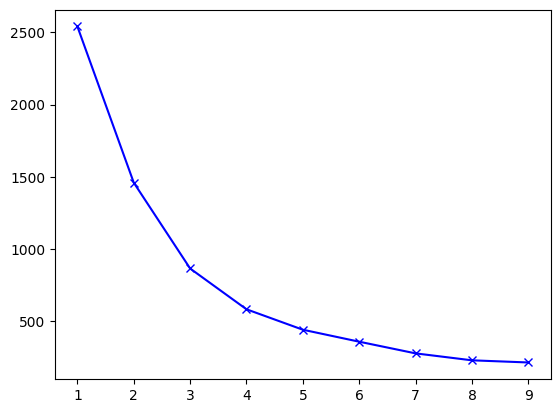

Silhouette method


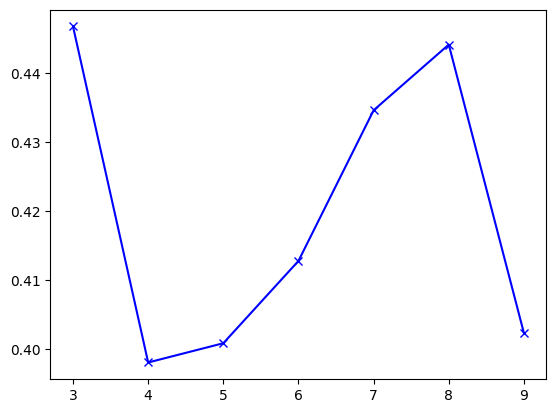

New map


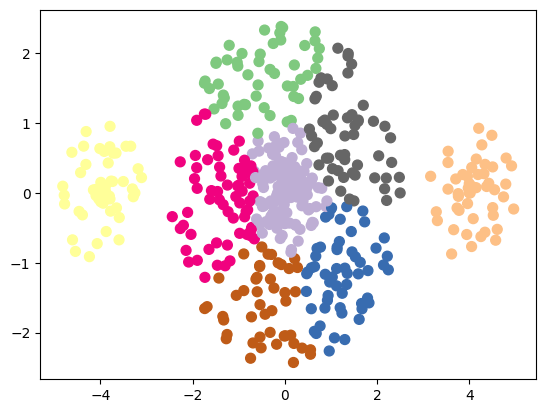

Original map


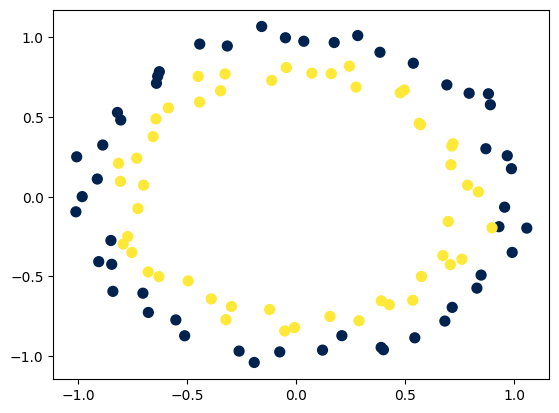

Elbow method


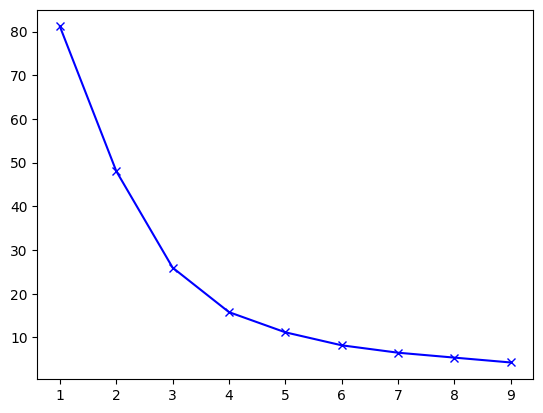

Silhouette method


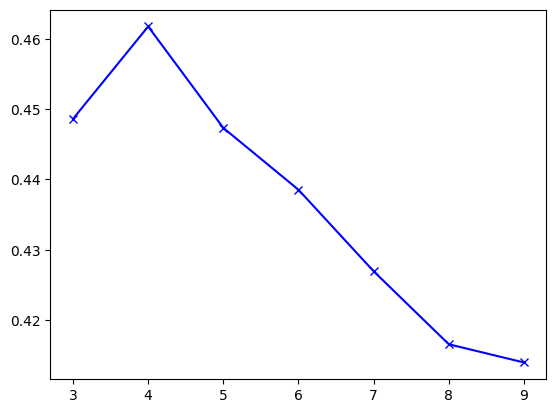

New map


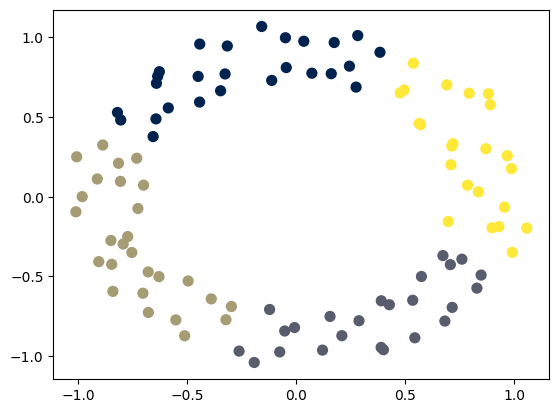

Original map


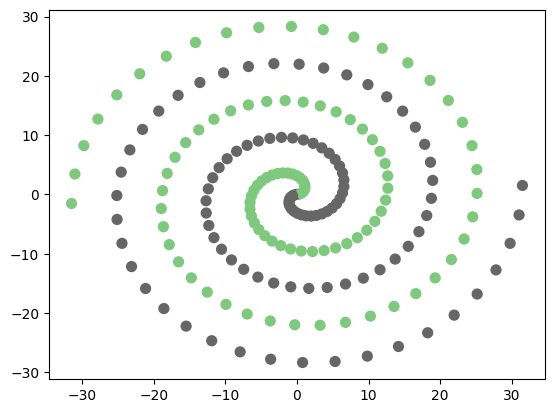

Elbow method


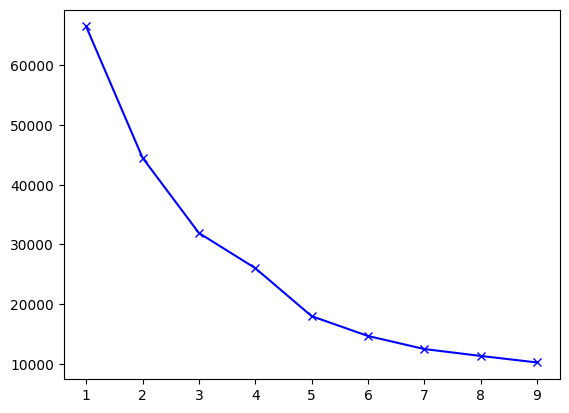

Silhouette method


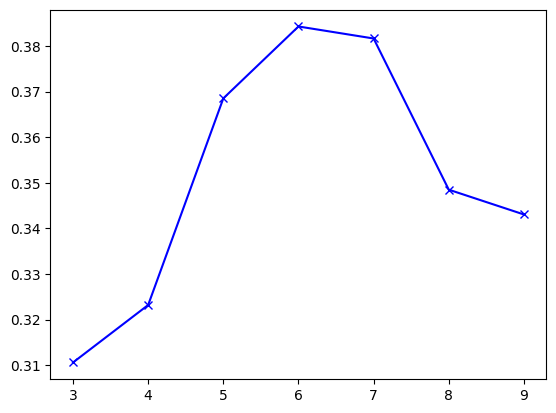

New map


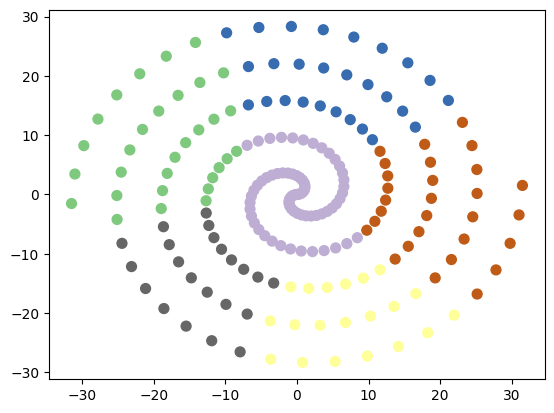

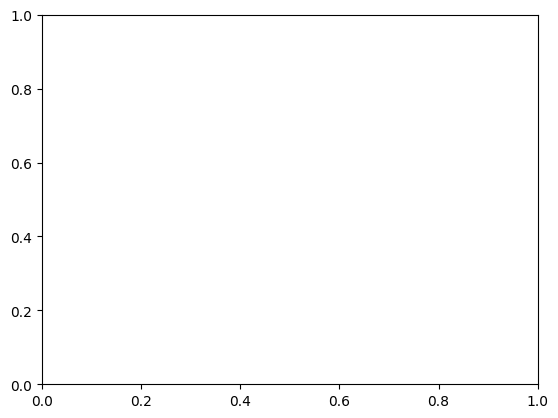

In [8]:
################ Problem #3 #############################
#imports
from sklearn.cluster import KMeans;
import matplotlib.pyplot as plot;
from sklearn.datasets import make_circles;
from sklearn.metrics import silhouette_score as ss;
import random;
import math;
import numpy as np;

#global variables
seed = 1880333;

def main():
  #make the third complicated cluster
  print("Original map");
  x, y = makeUniqueBlobs(400, 50);
  plot.scatter([i[0] for i in x], [i[1] for i in x], c=y, s=50, cmap="Accent");
  plot.show();
  plot.cla();
  scores(x, y);
  kmeans = KMeans(n_clusters = 8, random_state = seed).fit_predict(x);
  print("New map");
  plot.scatter([i[0] for i in x], [i[1] for i in x], c=kmeans, s=50, cmap="Accent");
  plot.show();
  plot.cla();

  #make the first complicated cluster
  print("Original map");
  x1, y1 = make_circles(noise = 0.05, random_state = seed);
  plot.scatter(x1[:, 0], x1[:, 1], c=y1, s=50, cmap='cividis'); #straight up just the colors of the US Navy
  plot.show();
  plot.cla();
  scores(x1, y1);
  kmeans = KMeans(n_clusters = 4, random_state = seed).fit_predict(x1);
  print("New map");
  plot.scatter(x1[:, 0], x1[:, 1], c=kmeans, s=50, cmap="cividis");
  plot.show();
  plot.cla();

  #make the second complicated cluster
  print("Original map");
  x2, y2 = makeSpirals(100);
  plot.scatter([i[0] for i in x2], [i[1] for i in x2], c=y2, s=50, cmap="Accent");
  plot.show();
  plot.cla();
  scores(x2, y2);
  kmeans = KMeans(n_clusters = 6, random_state = seed).fit_predict(x2);
  print("New map");
  plot.scatter([i[0] for i in x2], [i[1] for i in x2], c=kmeans, s=50, cmap="Accent");
  plot.show();
  plot.cla();

def scores(xv, y):
  #code inspired by: https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/
  elbow_method = [];
  silhouette_score = [];
  for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state = seed).fit(xv);
    elbow_method.append(kmeans.inertia_);
    if k >= 3:
      #this method only works when k >= 3
      silhouette_score.append(ss(xv, kmeans.labels_));
  print("Elbow method");
  plot.plot(range(1, 10), elbow_method, 'bx-');
  plot.show();
  plot.cla();
  print("Silhouette method");
  plot.plot(range(3, 10), silhouette_score, 'bx-');
  plot.show();
  plot.cla();


def makeSpirals(numPoints):
  x = [];
  y = [];
  for i in range(numPoints):
    t = i/(2*math.pi);
    #add to the first helix
    x.append([2*t*math.cos(t), 2*t*math.sin(t)]);
    y.append([0]);
    #add to the second helix
    x.append([2*t*math.cos(t+math.pi), 2*t*math.sin(t+math.pi)]);
    y.append([1]);

  return x, y;

def makeUniqueBlobs(numPointsBig, numPointsSmall):
  centers = [-4, 0, 4];
  random.seed(1880333);
  x = [];
  y = [];
  for i in range(numPointsSmall):
    r = random.random();
    t = i/(2*math.pi);
    #add to the first circle
    x.append([r*math.cos(t)+centers[0], r*math.sin(t)]);
    y.append([0]);

    #add to the second circle
    r = random.random();
    x.append([r*math.cos(t) + centers[2], r*math.sin(t)]);
    y.append([2]);

  for i in range(numPointsBig):
    r = random.random() * 2.5;
    t = i/(2*math.pi);
    #add to the middle circle
    x.append([r*math.cos(t) + centers[1], r*math.sin(t)]);
    y.append([1]);
  return x, y;


if __name__ == "__main__":
  main();

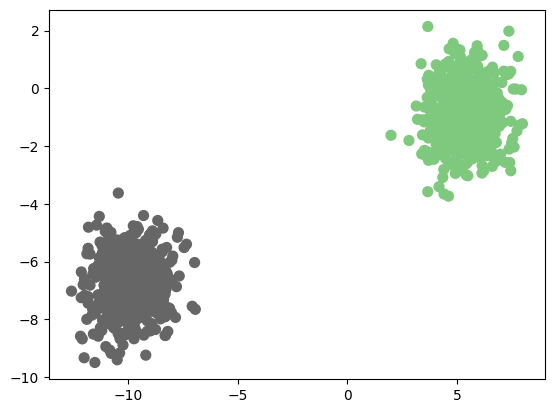

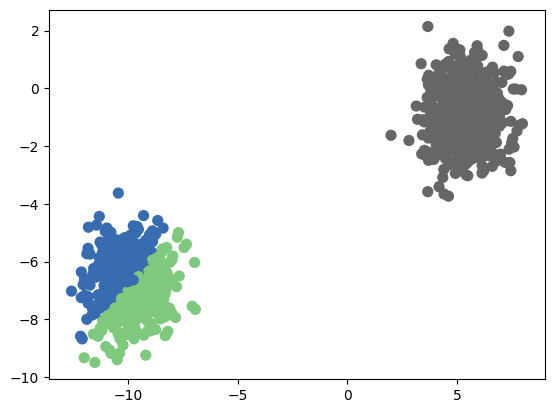

1
21
41
61
81
101
121
141
161
181
201
221
241
261
281
301
321
341
361
381
401
421
441
461
481
501
521
541
561
581
601
621
641
661
681
701
721
741
761
781
801
821
841
861
881
901
921
941
961
981


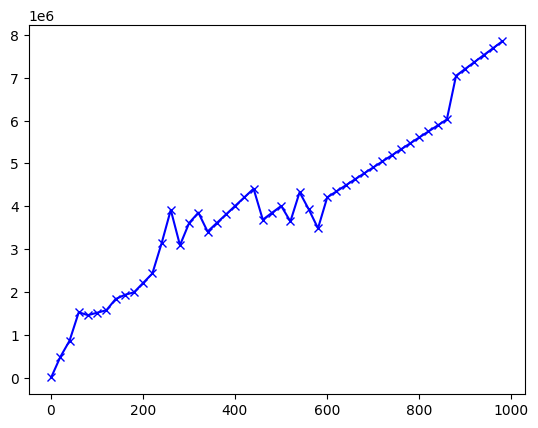

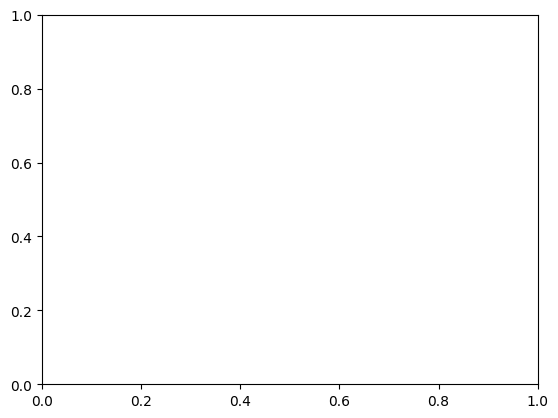

In [28]:
############## Problem #4 - kMeans ############################
from sklearn.datasets import make_blobs;
import random;
import matplotlib.pyplot as plot;
euclideanCount = 0;

def main():
  global euclideanCount;
  x1, y1 = make_blobs(n_samples = 1000, n_features = 2, centers = 2, random_state = 1880333);
  plot.scatter(x1[:, 0], x1[:, 1], c=y1, s=50, cmap='Accent'); #straight up just the colors of the US Navy
  plot.show();
  plot.cla();
  centroids = kmeans(x1, 3);
  predictions = makePredictions(x1, centroids);
  plot.scatter(x1[:, 0], x1[:, 1], c=predictions, s=50, cmap='Accent'); #straight up just the colors of the US Navy
  plot.show();
  plot.cla();

  #count up the euclideans for each k
  es = [];
  for i in range(1, 1000, 20):
    euclideanCount = 0;
    print(i);
    centroids = kmeans(x1, i);
    predictions = makePredictions(x1, centroids);
    es.append(euclideanCount);
  plot.plot(range(1, 1000, 20), es, 'bx-');
  plot.show();
  plot.cla();

def kmeans(data, k):
  #pick initial points
  #centroids = [[centroid location, [points in cluster]]]
  centroids = [];
  random.seed(18);
  for i in range(k):
    centroids.append([data[random.randint(0, len(data)-1)], []]);

  #perform the kmeans
  counter = 0;
  new_centroids = [];
  change = True;
  while (counter < 1000 and change):
    new_centroids = [];
    counter += 1;
    #group the points into their clusters
    for d in data:
      close = findClosest(d, centroids);
      centroids[close][1].append(d);

    #make new centroids
    for c in centroids:
      new_centroids.append(makeNewPoints(c));
    change = bigChange(centroids, new_centroids);
    centroids = new_centroids;
  return new_centroids;

def makeNewPoints(points):
  if points[1] == []: return points;
  featureSums = [0]*len(points[1][0]);
  for p in points[1]:
    for i in range(len(p)):
      featureSums[i] += p[i];
  return [[f/len(points[1]) for f in featureSums], []];

def findClosest(point, centroids):
  closest = 0;
  minDist = 100000;
  for c in range(len(centroids)):
    dist = euclidean(point, centroids[c][0]);
    if (dist < minDist):
      minDist = dist;
      closest = c;
  return closest;

def euclidean(p1, p2):
  global euclideanCount;
  euclideanCount += 1;
  sum = 0;
  for i in range(len(p1)):
    sum += (p1[i]-p2[i])**2;
  return sum ** 0.5;

def bigChange(oldC, newC):
  #centers aren't changing
  if newC == []: return True;
  same = True;
  for j in range(len(oldC)):
    for i in range(len(oldC[0])):
      if oldC[j][0][i] != newC[j][0][i]:
        same = False;
  if same: return False;
  return True;

def makePredictions(data, centroids):
  predictions = [];
  for d in data:
    predictions.append(findClosest(d, centroids));
  return predictions;

if __name__ == "__main__":
  main();

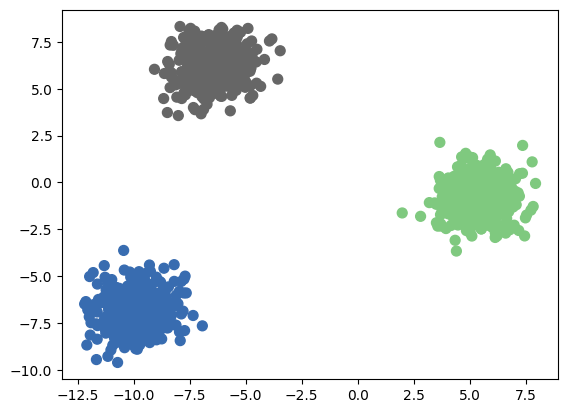

1
21
41
61
81
101
121
141
161
181
201
221
241
261
281
301
321
341
361
381
401
421
441
461
481
501
521
541
561
581
601
621
641
661
681
701
721
741
761
781
801
821
841
861
881
901
921
941
961
981


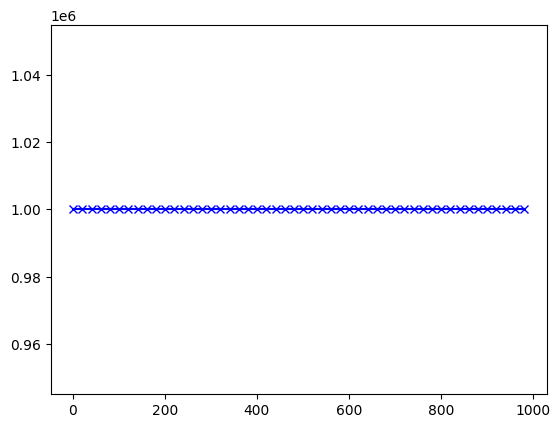

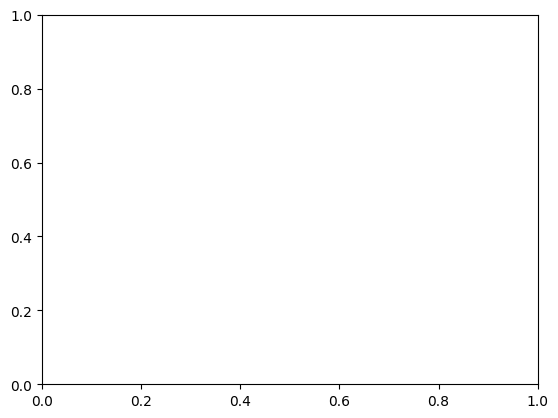

In [32]:
############## Problem #4 - kNN ###############################
from sklearn.datasets import make_blobs;
import sklearn.model_selection as sk;
data = [];
test = [];
k = 0;
euclideanCount = 0;

def main():
  global data, test, k, euclideanCount;
  x1, y1 = make_blobs(n_samples = 1000, n_features = 2, centers = 3, random_state = 1880333);
  plot.scatter(x1[:, 0], x1[:, 1], c=y1, s=50, cmap='Accent');
  plot.show();
  plot.cla();
  data = [x1[i] + y1[i] for i in range(len(x1))];
  test = [x1[i] + y1[i] for i in range(len(x1))];
  #k = int(input("What would you like the k to be?: "));
  k=3;

  runModel();

#count up the euclideans for each k
  es = [];
  for i in range(1, 1000, 20):
    k = i;
    euclideanCount = 0;
    print(i);
    centroids = runModel();
    es.append(euclideanCount);
  plot.plot(range(1, 1000, 20), es, 'bx-');
  plot.show();
  plot.cla();

def runModel():

  global data, test, k;

  #loop through each test point
  for point in test:
    #returns list of distances in a tuple (distance, class prediction)
    distances = findAllDistances(point);

    #sort list
    distances.sort();

    #choose the first k points
    kPoints = [kay[1] for kay in distances[:k]];

    #calculate majority and pick it as class
    classAssigned = assignClass(kPoints);

def findAllDistances(point):
  global data;
  dists = [];
  for dataPoint in data:
    dists.append((euclid(dataPoint[:-1], point[:-1]), dataPoint[-1]));
  return dists;

def euclid(p1, p2):
  #find euclidean distance between two points
  global euclideanCount;
  euclideanCount += 1;
  sumSquares = 0;
  for i in range(len(p1)):
    sumSquares += (float(p1[i]) - float(p2[i])) ** 2;

  return sumSquares ** 0.5;

def assignClass(kPoints):
  #only 3 classes, so vote for each
  setosaVotes = 0;
  versicolorVotes = 0;

  for kp in kPoints:
    if kp == "Iris-setosa": setosaVotes += 1;
    else: versicolorVotes += 1;

  votes = [(setosaVotes, "Iris-setosa"), (versicolorVotes, "Iris-versicolor")];

  votes.sort();
  return votes[-1][1];


if __name__ == "__main__":
  main();